Apesar do poder dos computadores modernos, somar uma série numérica com muitos termos pode exigir cuidado com a ordem das operações. Em ponto flutuante, a ordem em que somamos os termos pode afetar significativamente a acuracidade do resultado.

Neste exercício, o uso da linguagem Python é obrigatório. Utilize `numpy` e `matplotlib` conforme necessário.

a) Soma crescente e decrescente

Considere a seguinte soma harmônica finita:

Sup=∑Nn=11n,Sdown=∑1n=N1n

Matematicamente, ambas devem produzir o mesmo resultado para qualquer N
. No entanto, ao utilizar números em ponto flutuante, pode haver diferenças devido a erros de arredondamento acumulados.

Tarefa:

- Escreva um programa em Python que calcule Sup
 e Sdown
 como função de N
.
- Calcule o erro relativo entre as duas somas usando a expressão:

Erro relativo=|Sup−Sdown||Sup|+|Sdown|

In [11]:
#bibliotecas
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def soma_harmonica(N):
    sup = 0.0
    for n in range(1, N + 1):  # Soma crescente
        sup += 1.0 / n

    sdown = 0.0
    for n in range(N, 0, -1):  # Soma decrescente
        sdown += 1.0 / n

    erro_relativo = np.abs(sup - sdown) / (np.abs(sup) + np.abs(sdown))
    return erro_relativo

# Geração dos valores de N
Ns = np.logspace(1, 7, 50, dtype=int)
erros = [soma_harmonica(N) for N in Ns]

Conforme o N aumenta, o erro se acumula e as diferencças entre sup e Sdown impactam mais

b) Análise gráfica do erro

- Faça um gráfico log-log do erro relativo versus N
, para N
 variando de 10
 até 107
.
- Interprete o comportamento do gráfico. Você observa uma região linear?

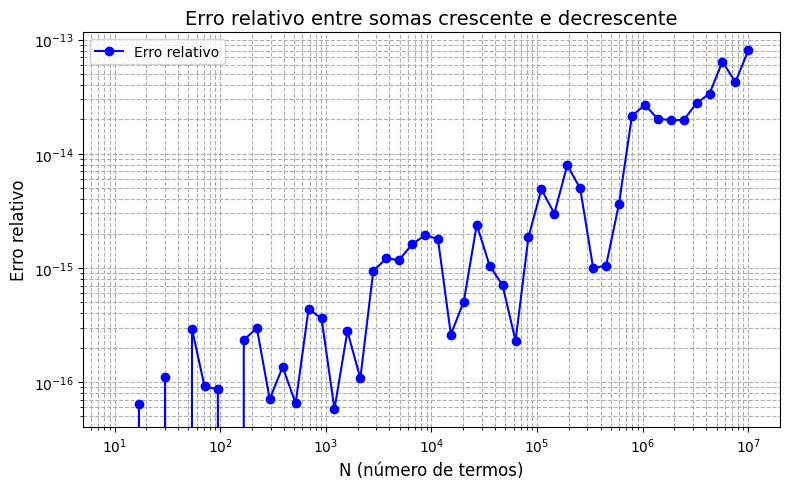

In [13]:
#grafico log-log
plt.figure(figsize=(8,5))
plt.loglog(Ns, erros, marker='o', color='blue', label='Erro relativo')
plt.xlabel('N (número de termos)', fontsize=12)
plt.ylabel('Erro relativo', fontsize=12)
plt.title('Erro relativo entre somas crescente e decrescente', fontsize=14)
plt.grid(True, which='both', ls='--')
plt.legend()
plt.tight_layout()
plt.show()

c) Interpretação e explicação

- Por que a soma decrescente (do maior para o menor termo) tende a ser mais precisa?
- Relacione isso com o fato de que, em ponto flutuante, adicionar termos muito pequenos a valores grandes pode não alterar o resultado devido à limitação do número de dígitos significativos.

Resposta: A soma decrescente tende a ser mais precisa porque os termos maiores são somados primeiro quando a variavel acumuladora ainda não perder a precisão

d) (Exploração mais desafiadora)

Implemente uma terceira estratégia de soma chamada "soma compensada de Kahan". Ela visa reduzir os erros de arredondamento acumulados. A fórmula funciona com uma variável de compensação que armazena os erros perdidos durante cada adição.

- Reimplemente a soma crescente usando o algoritmo de Kahan.
- Compare os valores obtidos com os das somas simples crescentes e decrescentes.
- Plote os erros relativos das três versões em um mesmo gráfico log-log para comparação.

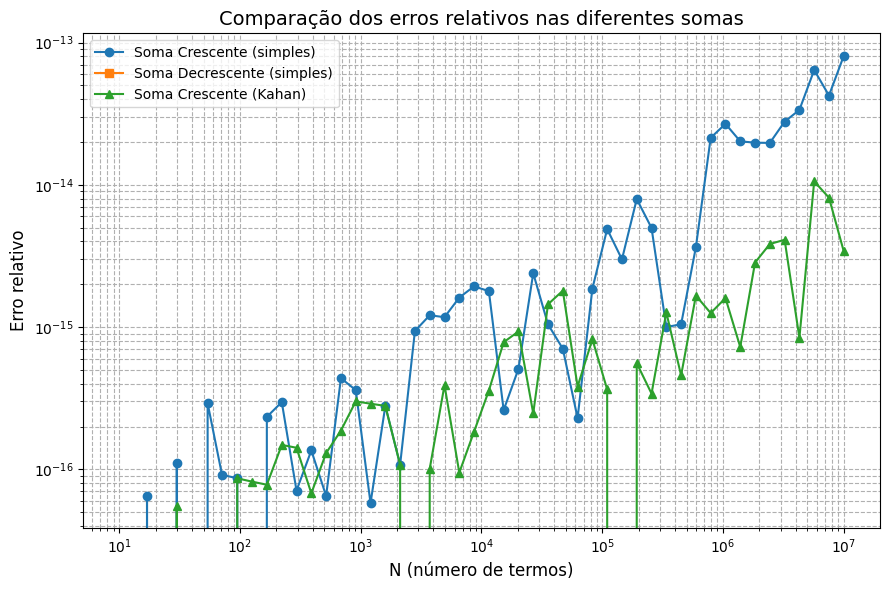

In [14]:
def soma_crescente(N):
    s = 0.0
    for n in range(1, N + 1):
        s += 1.0 / n
    return s

def soma_decrescente(N):
    s = 0.0
    for n in range(N, 0, -1):
        s += 1.0 / n
    return s

def soma_kahan(N):
    s = 0.0
    c = 0.0  # compensação
    for n in range(1, N + 1):
        y = 1.0 / n - c      # subtrai compensação
        t = s + y            # soma temporária
        c = (t - s) - y      # calcula novo erro de compensação
        s = t
    return s

# Vetor de Ns para teste
Ns = np.logspace(1, 7, 50, dtype=int)

# Calcular somas e erros relativos
erros_cresc = []
erros_desc = []
erros_kahan = []

for N in Ns:
    s_cresc = soma_crescente(N)
    s_desc = soma_decrescente(N)
    s_kah = soma_kahan(N)

    # Usamos a soma decrescente como referência mais precisa para calcular os erros relativos das outras somas
    erro_cresc = np.abs(s_cresc - s_desc) / (np.abs(s_cresc) + np.abs(s_desc))
    erro_kahan = np.abs(s_kah - s_desc) / (np.abs(s_kah) + np.abs(s_desc))
    erro_desc = 0.0  # Referência, erro é zero

    erros_cresc.append(erro_cresc)
    erros_desc.append(erro_desc)
    erros_kahan.append(erro_kahan)

# Plot comparativo
plt.figure(figsize=(9,6))
plt.loglog(Ns, erros_cresc, 'o-', label='Soma Crescente (simples)')
plt.loglog(Ns, erros_desc, 's-', label='Soma Decrescente (simples)')
plt.loglog(Ns, erros_kahan, '^-', label='Soma Crescente (Kahan)')
plt.xlabel('N (número de termos)', fontsize=12)
plt.ylabel('Erro relativo', fontsize=12)
plt.title('Comparação dos erros relativos nas diferentes somas', fontsize=14)
plt.grid(True, which='both', ls='--')
plt.legend()
plt.tight_layout()
plt.show()
